# Exploratory Data Analysis on Heart Disease

##### Project Objective:
Globally, heart diseases (medically known as cardiovascular diseases), including conditions affecting the heart and blood vessels, are the leading cause of death according to the WHO, with 17.9 million deaths in 2019. In Hong Kong, heart diseases rank fourth in mortality, with an average of 10.9 deaths per day in 2022, primarily affecting males. In our study, we employ exploratory data analysis (EDA) to investigate the association between different variables and the presence of heart disease.

This notebook contains the major working procedures of our study into a heart disease dataset.

# Section 1: Data Preprocessing

In [ ]:
# Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import scipy.stats as stats
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.api import Logit
import imblearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Dataset Description

The dataset utilized in this study consists of five distinct datasets, namely the Cleveland, Hungarian, Switzerland, Long Beach VA, and Statlog datasets. These datasets are widely recognized and extensively employed in the medical field for heart disease research.

The detailed description of all the variables are as follows:



| No. | Attribute           | Description                                                                 | Type     |
|-----|---------------------|-----------------------------------------------------------------------------|----------|
| 1   | age                 | Patient Age in years                                                       | Numeric  |
| 2   | sex                 | Gender of patient (Male - 1, Female - 0)                                     | Binary  |
| 3   | chest pain type     | Type of chest pain experienced by the patient categorized into: 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal Pain, 4 = Asymptomatic | Nominal  |
| 4   | resting bps          | Level of blood pressure at resting mode in mm/HG                             | Numeric  |
| 5   | cholesterol         | Serum cholesterol in mg/dl                                                  | Numeric  |
| 6   | fasting blood sugar | Blood sugar levels on fasting > 120 mg/dl represented as 1 (True) or 0 (False) | Binary  |
| 7   | resting ecg         | Result of electrocardiogram while at rest: 0 = Normal, 1 = Having ST-T wave abnormality, 2 = Left ventricular hypertrophy | Nominal  |
| 8   | max heart rate      | Maximum heart rate achieved                                                  | Numeric  |
| 9   | exercise angina     | Angina induced by exercise: 0 = No, 1 = Yes                                   | Binary  |
| 10  | oldpeak             | Exercise-induced ST-depression in comparison with the state of rest          | Numeric  |
| 11  | ST Slope            | ST segment measured in terms of slope during peak exercise: 1 = Upsloping, 2 = Flat, 3 = Downsloping | Nominal  |
| 12  | target              | Target variable: 1 = Patient is suffering from heart disease, 0 = Patient is normal | Binary  |

In [ ]:
    # Load the CSV file as df_1
df_1 = pd.read_csv('Dataset Heart Disease.csv')

# View the DataFrame
df_1.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [ ]:
# Remove the unnecessary column 'Unnamed: 0'
df_1.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Determine the number of unique elements of the data set
df_1.nunique()

age                     49
sex                      2
chest pain type          4
resting bps             63
cholesterol            221
fasting blood sugar      2
resting ecg              3
max heart rate         109
exercise angina          2
oldpeak                 43
ST slope                 4
target                   2
dtype: int64

In [ ]:
# Determine whether there are missing values
df_1.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [ ]:
# Determine whether there are duplicated records
df_1.duplicated().sum()

# Drop duplicate records if any
# df_1 = df_1.drop_duplicates(subset=None, keep='first', inplace=True)

0

Observation:
- There are no null values or duplicate records in the dataset.

In [ ]:
# Explore the data
print("Dataset size (number of rows, number of columns):", df_1.shape)

Dataset size (number of rows, number of columns): (1048, 12)


In [ ]:
# Explore the data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB


In [ ]:
# Convert categorical data from label to word

df_2 = df_1.copy()

sex_dict = {0: "Female", 1: "Male"}
df_2['sex'] = df_2['sex'].map(sex_dict)

chest_pain_type_dict = {1: "Typical Angina", 2: "Atypical Angina", 3: "Non-anginal Pain", 4: "Asymptomatic"}
df_2['chest pain type'] = df_2['chest pain type'].map(chest_pain_type_dict)

fasting_blood_sugar_dict = {0: "False", 1: "True"}
df_2['fasting blood sugar'] = df_2['fasting blood sugar'].map(fasting_blood_sugar_dict)

resting_ecg_dict = {0: "Normal", 1: "ST-T wave abnormality", 2: "Left ventricular hypertrophy"}
df_2['resting ecg'] = df_2['resting ecg'].map(resting_ecg_dict)

exercise_angina_dict = {0: "No", 1: "Yes"}
df_2['exercise angina'] = df_2['exercise angina'].map(exercise_angina_dict)

st_slope_dict = {1: "Upsloping", 2: "Flat", 3: "Downsloping"}
df_2['ST slope'] = df_2['ST slope'].map(st_slope_dict)

target_dict = {0: "Normal", 1: "Heart Disease"}
df_2['target'] = df_2['target'].map(target_dict)

df_2.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,Male,Atypical Angina,140,289.0,False,Normal,172,No,0.0,Upsloping,Normal
1,49,Female,Non-anginal Pain,160,180.0,False,Normal,156,No,1.0,Flat,Heart Disease
2,37,Male,Atypical Angina,130,283.0,False,ST-T wave abnormality,98,No,0.0,Upsloping,Normal
3,48,Female,Asymptomatic,138,214.0,False,Normal,108,Yes,1.5,Flat,Heart Disease
4,54,Male,Non-anginal Pain,150,195.0,False,Normal,122,No,0.0,Upsloping,Normal


In [ ]:
# Create a new column based on age column

# Equal-Width binning in increments of 10 years
age_bins = range(0, 100, 10)

# Create age_group column
df_2['age_group'] = pd.cut(df_2['age'], bins=age_bins)

# Function to convert the age group format
def format_age_group(age_group):
    start, end = age_group.left, age_group.right
    if start == 0:
        return f"0-{int(end-1)}"
    else:
        return f"{int(start+1)}-{int(end)}"

# Apply the function to the 'age_group' column
df_2['age_group'] = df_2['age_group'].apply(format_age_group)
df_2.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group
0,40,Male,Atypical Angina,140,289.0,False,Normal,172,No,0.0,Upsloping,Normal,31-40
1,49,Female,Non-anginal Pain,160,180.0,False,Normal,156,No,1.0,Flat,Heart Disease,41-50
2,37,Male,Atypical Angina,130,283.0,False,ST-T wave abnormality,98,No,0.0,Upsloping,Normal,31-40
3,48,Female,Asymptomatic,138,214.0,False,Normal,108,Yes,1.5,Flat,Heart Disease,41-50
4,54,Male,Non-anginal Pain,150,195.0,False,Normal,122,No,0.0,Upsloping,Normal,51-60


In [ ]:
# Create reference columns about normal maximum heart rate

df_2['upper_rate'] = (220 - df_2.age) + 15
df_2['lower_rate'] = (220 - df_2.age) - 15

# Check if the 'max heart rate' value is within the 'upper' and 'lower' reference
df_2['max heart rate status'] = "Normal"
df_2.loc[(df_2['max heart rate'] > df_2['upper_rate']) | (df_2['max heart rate'] < df_2['lower_rate']), 'max heart rate status'] = "Abnormal"

# Display the updated dataframe
df_2.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group,upper_rate,lower_rate,max heart rate status
0,40,Male,Atypical Angina,140,289.0,False,Normal,172,No,0.0,Upsloping,Normal,31-40,195,165,Normal
1,49,Female,Non-anginal Pain,160,180.0,False,Normal,156,No,1.0,Flat,Heart Disease,41-50,186,156,Normal
2,37,Male,Atypical Angina,130,283.0,False,ST-T wave abnormality,98,No,0.0,Upsloping,Normal,31-40,198,168,Abnormal
3,48,Female,Asymptomatic,138,214.0,False,Normal,108,Yes,1.5,Flat,Heart Disease,41-50,187,157,Abnormal
4,54,Male,Non-anginal Pain,150,195.0,False,Normal,122,No,0.0,Upsloping,Normal,51-60,181,151,Abnormal


In [ ]:
# Apply label encoding for age_group and max heart rate in df_1 for later usage

le = preprocessing.LabelEncoder()

df_1['age_group'] = df_2['age_group'].copy()
age_group_label = le.fit_transform(df_1['age_group'])
df_1['age_group_label'] = age_group_label + 1

df_1['max heart rate status'] = df_2['max heart rate status'].copy()
max_heart_rate_label = le.fit_transform(df_1['max heart rate status'])
max_heart_rate_label = max_heart_rate_label ^ 1
df_1['max heart rate label'] = max_heart_rate_label

df_1.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group,age_group_label,max heart rate status,max heart rate label
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0,31-40,2,Normal,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1,41-50,3,Normal,0
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0,31-40,2,Abnormal,1
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1,41-50,3,Abnormal,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0,51-60,4,Abnormal,1


In [ ]:
# Explore the data
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    1048 non-null   int64   
 1   sex                    1048 non-null   object  
 2   chest pain type        1048 non-null   object  
 3   resting bps            1048 non-null   int64   
 4   cholesterol            1048 non-null   float64 
 5   fasting blood sugar    1048 non-null   object  
 6   resting ecg            1048 non-null   object  
 7   max heart rate         1048 non-null   int64   
 8   exercise angina        1048 non-null   object  
 9   oldpeak                1048 non-null   float64 
 10  ST slope               1026 non-null   object  
 11  target                 1048 non-null   object  
 12  age_group              1048 non-null   category
 13  upper_rate             1048 non-null   int64   
 14  lower_rate             1048 non-null   i

In [ ]:
# Descriptive statistics
df_2.describe()

,age,resting bps,cholesterol,max heart rate,oldpeak,upper_rate,lower_rate
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,53.325382,132.613550,245.172710,142.918893,0.942366,181.674618,151.674618
std,9.397822,17.367605,57.101359,24.427115,1.100429,9.397822,9.397822
min,28.000000,92.000000,85.000000,69.000000,-0.100000,158.000000,128.000000
25%,46.000000,120.000000,208.000000,125.000000,0.000000,175.000000,145.000000
50%,54.000000,130.000000,239.000000,144.000000,0.600000,181.000000,151.000000
75%,60.000000,140.000000,275.000000,162.000000,1.600000,189.000000,159.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,207.000000,177.000000


Observation:
- The dataset consists of 11 independent variables (6 categorical variables and 5 numeric variables).
- Dedependent variable (Y) is target, which is a categorical variable.
- Mean and median (50%) of all columns, except oldpeak, are almost the same, meaning that the data is symmetrically distributed.

# Section 2: Univariate analysis

- To learn about the fundamental characteristics of the dataset
- To evaluate the dataset's balance in order to ensure its suitability for analysis purposes
- To facilitate further analysis by creating custom columns if required
- To examine the assoication between each of the variables and the target variable

### 1. Target

In [ ]:
# Determine if dataset is balanced

print(df_2['target'].value_counts())
print(df_2['target'].value_counts(normalize=True))

target
Normal           528
Heart Disease    520
Name: count, dtype: int64
target
Normal           0.503817
Heart Disease    0.496183
Name: proportion, dtype: float64


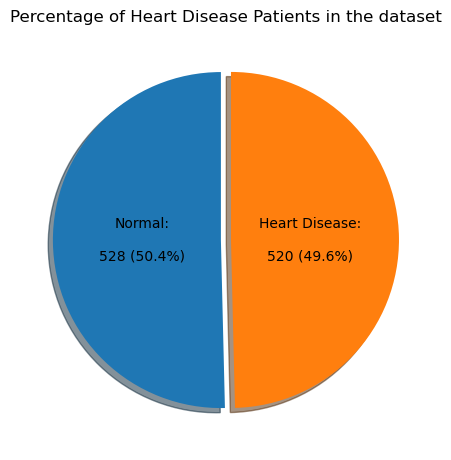

In [ ]:
plt.figure(figsize=(13, 12))

# Retrieve the counts
counts = df_2["target"].value_counts()

# Calculate the percentage for each category
total_count = sum(counts)
normal_percentage = counts["Normal"] / total_count * 100
heart_disease_percentage = counts["Heart Disease"] / total_count * 100

# Create the pie chart
plt.subplot(221)
wedges, texts, autotexts = plt.pie(counts, autopct="", startangle=90, explode=[0.03, 0.03], shadow=True)
plt.title("Percentage of Heart Disease Patients in the dataset")

# Display the text
plt.text(-0.5, 0, f'Normal:\n\n{counts["Normal"]} ({normal_percentage:.1f}%)', horizontalalignment='center', verticalalignment='center')
plt.text(0.5, 0, f'Heart Disease:\n\n{counts["Heart Disease"]} ({heart_disease_percentage:.1f}%)', horizontalalignment='center', verticalalignment='center')

plt.show()

Observation:
- The number of normal patients and patients with heart disease are nearly the same, indicating that this is a balanced dataset.


### 2. Age

In [ ]:
# Create boxplots for numerical feature

fig = px.box(df_2, x='age', points='all', title='Distribution by Age in the dataset')
fig.update_xaxes(title_text="Age")

fig.update_layout(
    width=1000,
    height=400,
    title_x=0.5
)
fig.show()

In [ ]:
# Define the custom order of age groups for the plot
custom_order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80"]

# Create the bar chart with the custom order
fig = px.histogram(df_2, x='age_group', category_orders={'age_group': custom_order}, title='Distribution by Age Group in the dataset')
fig.update_traces(texttemplate='%{value}')
fig.update_yaxes(title_text="Count")
fig.update_xaxes(title_text="Age group")

# Add a red curve to show the distribution of the age group above the bar plot
x_values = custom_order
y_values = df_2['age_group'].value_counts()[custom_order]

fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', line=dict(color='rgba(255, 48, 47, 0.5)', shape='spline'), showlegend=False))

fig.update_layout(
    width=600,
    height=400,
    title_x=0.5
)

fig.show()

Observation:
- The distribution of age follows a normal distribution pattern.

### 3. Sex

In [ ]:
# Create histogram for categorical variable

fig = px.histogram(df_2, x='sex', color = 'sex', barmode='group', title='Distribution by Sex in the dataset')
fig.update_traces(texttemplate='%{value}')
fig.update_yaxes(title_text="Count")
fig.update_xaxes(title_text="Sex")
fig.update_layout(
    width=600,
    height=400,
    title_x=0.5
)
fig.show()

We will focus on examining each of the variables in the dataset concerning the target variable:

A.   Target (categorical dependent variable) and each categorical independent variable:
1. Heart Disease Prevalence Ratio
2. Histogram
3. Chi-squared test of independence
4. Cramer's V (for verifying our observations)

B.   Target (categorical dependent variable) and each numeric independent variable:
1. Boxplot
2. Regression Plot - Probability of having heart disease
2. Point-Biserial Correlation Coefficient

## A. Association between target and categorical variables

### 1. Age group

In [ ]:
# Define the custom order of age groups
age_group_order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80"]

# Create the histogram with the custom order
fig_hist = px.histogram(df_2, x='age_group', color='target', barmode='group')
fig_hist.update_traces(texttemplate='%{value}')

# Heart Disease Prevalence Ratio by age group
df_2['hd_ratio_age_group'] = df_2.apply(lambda row:
                             df_2.loc[df_2['target'] == 'Heart Disease']['age_group'].value_counts().get(row['age_group'], 0) /
                             df_2['age_group'].value_counts().get(row['age_group'], 1),
                             axis=1)

fig_scatter = px.scatter(df_2, x='age_group', y='hd_ratio_age_group')
fig_scatter.update_traces(marker=dict(color='green', size=12),selector=dict(mode="markers"))

# Create subplots to display the histograms and scatter plots horizontally
fig = make_subplots(rows=1, cols=2, subplot_titles=("Distribution by Age Group",
                                                     "Heart Disease Prevalence Ratio by Age Group"))

for trace in fig_hist['data']:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_scatter['data']:
    fig.add_trace(trace, row=1, col=2)

fig.update_xaxes(categoryorder='array', categoryarray=age_group_order, row=1, col=1)
fig.update_xaxes(categoryorder='array', categoryarray=age_group_order, row=1, col=2)

fig.update_layout(
    height=400,
    width=1200,
    showlegend=True,
    legend=dict(x=-0.2, y=1.0)
)

# Update axes labels
fig.update_xaxes(title_text="Age group", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Age group", row=1, col=2)
fig.update_yaxes(title_text="Ratio",range=[0, 1], row=1, col=2)

fig.show()

Observation:
- There are no records specifically indicating heart disease in children and teenagers. The dataset primarily focuses on adults.
- The age ratio suggests that as individuals grow older, the likelihood of developing heart disease also increases.

In [ ]:
# Create contingency table: target and age_group
target_age = pd.crosstab(df_2['target'], columns=df_2['age_group'])
target_age

age_group,21-30,31-40,41-50,51-60,61-70,71-80
target,,,,,,
Heart Disease,1,32,126,218,124,19
Normal,5,61,151,215,89,7


In [ ]:
# perform the Chi-Squared Test of Independence
# null hypothesis H0: The patient type (target) and age_group are independent.
# alternative hypothesis H1: The patient type (target) and age_group are not independent.

chi2, p, dof, expected = chi2_contingency(target_age)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     25.217
p-value:            0.00012652
degrees of freedom: 5
expected frequencies:
[[  2.97709924  46.14503817 137.44274809 214.84732824 105.6870229
   12.90076336]
 [  3.02290076  46.85496183 139.55725191 218.15267176 107.3129771
   13.09923664]]


The p-value is smaller than 0.05: REJECT the null hypothesis (H0)
- The patient type (target) and age_group are NOT independent.

In [ ]:
# calculate Cramers V statistic for categorial-categorial association: target and age_group
association(target_age.values, method="cramer")

0.15511881772926947

When the degree of freedom is 5, we interpret v = 0.155 as there is a medium association between patient type (target) and age_group.

### 2. Sex

In [ ]:
# Create the histogram
fig_hist = px.histogram(df_2, x='sex', color='target', barmode='group')
fig_hist.update_traces(texttemplate='%{value}')

# Heart Disease Prevalence Ratio by sex
df_2['hd_ratio_sex'] = df_2.apply(lambda row:
                             df_2.loc[df_2['target'] == 'Heart Disease']['sex'].value_counts().get(row['sex'], 0) /
                             df_2['sex'].value_counts().get(row['sex'], 1),
                             axis=1)

fig_scatter = px.scatter(df_2, x='sex', y='hd_ratio_sex')
fig_scatter.update_traces(marker=dict(color='green', size=12),selector=dict(mode="markers"))

# Create subplots to display the histograms and scatter plots horizontally
fig = make_subplots(rows=1, cols=2, subplot_titles=("Distribution by Sex",
                                                     "Heart Disease Prevalence Ratio by Sex"))

for trace in fig_hist['data']:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_scatter['data']:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=1200, height=400, showlegend=True, legend=dict(x=-0.2, y=1.0))

# Update axes labels
fig.update_xaxes(title_text="Sex", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Sex", row=1, col=2)
fig.update_yaxes(title_text="Ratio",range=[0, 1], row=1, col=2)

fig.show()

Observation:
- It can be observed that the heart disease prevalence ratio is a little bit higher in MALES compared to females. This suggests that males may have a higher predisposition to develop heart disease compared to females.

In [ ]:
# Create contingency table: target and sex
target_sex = pd.crosstab(df_2['target'], columns=df_2['sex'])
target_sex

sex,Female,Male
target,,
Heart Disease,112,408
Normal,166,362


In [ ]:
# perform the Chi-Squared Test of Independence
# null hypothesis H0: The patient type (target) and sex are independent.
# alternative hypothesis H1: The patient type (target) and sex are not independent.

chi2, p, dof, expected = chi2_contingency(target_sex)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     12.674
p-value:            0.0003708
degrees of freedom: 1
expected frequencies:
[[137.9389313 382.0610687]
 [140.0610687 387.9389313]]


The p-value is smaller than 0.05: REJECT the null hypothesis (H0)
- The patient type (target) and sex are NOT independent.

In [ ]:
# calculate Cramers V statistic for categorial-categorial association: target and sex
association(target_sex.values, method="cramer")

0.11213132858141046

When the degree of freedom is 1, we interpret v = 0.112 as there is a small association between patient type (target) and sex.

### 3. Chest pain type

Chest pain can be divided into the following types:

1. Typical Angina:
The individual experiences the typical chest pain associated with angina, which is a feeling of pressure, tightness, or discomfort in the chest, often triggered by physical exertion or emotional stress.

2. Atypical Angina: The individual experiences chest pain that is similar to angina but does not fully meet the criteria for typical angina. This may include features such as pain not limited to the chest, difficulty identifying clear triggering factors, duration exceeding 10 minutes, and symptoms of mild discomfort.

3. Non-Anginal Pain: The individual experiences chest pain that is not related to angina, such as chest pain caused by other medical conditions or musculoskeletal issues.

4. Asymptomatic (No Chest Pain): The individual does not experience any chest pain or other symptoms related to heart disease.

In [ ]:
# Define the custom order of chest pain type
chest_pain_type_order = ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"]

# Create the histogram for chest pain type
fig_hist_pain = px.histogram(df_2, x='chest pain type', color='target', barmode='group')
fig_hist_pain.update_traces(texttemplate='%{value}')

# Heart Disease Prevalence Ratio by chest pain type
df_2['hd_ratio_pain'] = df_2.apply(lambda row:
                             df_2.loc[df_2['target'] == 'Heart Disease']['chest pain type'].value_counts().get(row['chest pain type'], 0) /
                             df_2['chest pain type'].value_counts().get(row['chest pain type'], 1),
                             axis=1)

fig_scatter_pain = px.scatter(df_2, x='chest pain type', y='hd_ratio_pain')
fig_scatter_pain.update_traces(marker=dict(color='green', size=12),selector=dict(mode="markers"))

# Create subplots to display the histograms and scatter plots horizontally
fig_pain = make_subplots(rows=1, cols=2, subplot_titles=("Distribution by Chest Pain Type",
                                                     "Heart Disease Prevalence Ratio by Chest Pain Type"))

for trace in fig_hist_pain['data']:
    fig_pain.add_trace(trace, row=1, col=1)

for trace in fig_scatter_pain['data']:
    fig_pain.add_trace(trace, row=1, col=2)

fig_pain.update_xaxes(categoryorder='array', categoryarray=chest_pain_type_order, row=1, col=1)
fig_pain.update_xaxes(categoryorder='array', categoryarray=chest_pain_type_order, row=1, col=2)

fig_pain.update_layout(width=1200, height=400, showlegend=True, legend=dict(x=-0.2, y=1.0))

# Update axes labels
fig_pain.update_xaxes(title_text="Chest pain type", row=1, col=1)
fig_pain.update_yaxes(title_text="Count", row=1, col=1)
fig_pain.update_xaxes(title_text="Chest pain type", row=1, col=2)
fig_pain.update_yaxes(title_text="Ratio",range=[0, 1], row=1, col=2)

fig_pain.show()

Observation:
- The number of individuals having heart disease who DO NOT experience definite chest pain (i.e. asymptomatic) is the highest in this dataset.

In [ ]:
# Create contingency table: target and chest pain type
target_pain = pd.crosstab(df_2['target'], columns=df_2['chest pain type'])
target_pain

chest pain type,Asymptomatic,Atypical Angina,Non-anginal Pain,Typical Angina
target,,,,
Heart Disease,290,62,114,54
Normal,103,154,141,130


In [ ]:
# perform the Chi-Squared Test of Independence
# null hypothesis H0: The patient type (target) and chest pain type are independent.
# alternative hypothesis H1: The patient type (target) and chest pain type are not independent.

chi2, p, dof, expected = chi2_contingency(target_pain)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     162.36
p-value:            5.6635e-35
degrees of freedom: 3
expected frequencies:
[[195.         107.17557252 126.52671756  91.29770992]
 [198.         108.82442748 128.47328244  92.70229008]]


The p-value is smaller than 0.05: REJECT the null hypothesis (H0)
- The patient type (target) and chest pain type are NOT independent.

In [ ]:
# calculate Cramers V statistic for categorial-categorial association: target and chest pain type
association(target_pain.values, method="cramer")

0.39360749488167845

When the degree of freedom is 3, we interpret v = 0.394 as there is a LARGE association between patient type (target) and chest pain type.

### 4. Fasting blood sugar

- Resting blood sugar refers to the level of glucose in the blood when the person is at rest, typically after not having eaten for several hours.
- The reference range for resting blood sugar is set at 120 mg/dl. If the fasting blood sugar value exceeds 120 mg/dl, it is considered elevated or high (True), while values equal to or below 120 mg/dl are considered normal (False).

In [ ]:
# Create the histogram for fasting blood sugar
fig_hist_sugar = px.histogram(df_2, x='fasting blood sugar', color='target', barmode='group')
fig_hist_sugar.update_traces(texttemplate='%{value}')

# Heart Disease Prevalence Ratio by fasting blood sugar
df_2['hd_ratio_sugar'] = df_2.apply(lambda row:
                             df_2.loc[df_2['target'] == 'Heart Disease']['fasting blood sugar'].value_counts().get(row['fasting blood sugar'], 0) /
                             df_2['fasting blood sugar'].value_counts().get(row['fasting blood sugar'], 1),
                             axis=1)

fig_scatter_sugar = px.scatter(df_2, x='fasting blood sugar', y='hd_ratio_sugar')
fig_scatter_sugar.update_traces(marker=dict(color='green', size=12),selector=dict(mode="markers"))

# Create subplots to display the histograms and scatter plots horizontally
fig_sugar = make_subplots(rows=1, cols=2, subplot_titles=("Distribution by Fasting Blood Sugar",
                                                     "Heart Disease Prevalence Ratio by Fasting Blood Sugar"))

for trace in fig_hist_sugar['data']:
    fig_sugar.add_trace(trace, row=1, col=1)

for trace in fig_scatter_sugar['data']:
    fig_sugar.add_trace(trace, row=1, col=2)

fig_sugar.update_layout(width=1200, height=400, showlegend=True, legend=dict(x=-0.2, y=1.0))

# Update axes labels and titles
fig_sugar.update_xaxes(title_text="Fasting blood sugar > 120 mg/dL", row=1, col=1)
fig_sugar.update_yaxes(title_text="Count", row=1, col=1)
fig_sugar.update_xaxes(title_text="Fasting blood sugar > 120 mg/dL", row=1, col=2)
fig_sugar.update_yaxes(title_text="Ratio",range=[0, 1], row=1, col=2)

fig_sugar.show()

Observation:
- Individuals with heart disease may have a little bit higher likelihood of having fasting blood sugar levels greater than 120 mg/dl compared to those without heart disease.

In [ ]:
# Create contingency table: target and fasting blood sugar
target_sugar = pd.crosstab(df_2['target'], columns=df_2['fasting blood sugar'])
target_sugar

fasting blood sugar,False,True
target,,
Heart Disease,415,105
Normal,463,65


In [ ]:
# perform the Chi-Squared Test of Independence
# null hypothesis H0: The patient type (target) and fasting blood sugar are independent.
# alternative hypothesis H1: The patient type (target) and fasting blood sugar are not independent.

chi2, p, dof, expected = chi2_contingency(target_sugar)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     11.403
p-value:            0.00073341
degrees of freedom: 1
expected frequencies:
[[435.64885496  84.35114504]
 [442.35114504  85.64885496]]


The p-value is smaller than 0.05: REJECT the null hypothesis (H0)
- The patient type (target) and fasting blood sugar are NOT independent.

In [ ]:
# calculate Cramers V statistic for categorial-categorial association: target and sex
association(target_sugar.values, method="cramer")

0.10689734152926005

When the degree of freedom is 1, we interpret v = 0.107 as there is a small association between patient type (target) and fasting blood sugar.

### 5. Resting electrocardiogram results

The resting electrocardiogram results refer to the findings of an electrocardiogram (ECG) taken while the individual is at rest.

- Normal: No significant abnormalities are observed in the ECG.
- Having ST-T wave abnormality: This indicates the presence of ST-T wave abnormalities in the resting ECG. These abnormalities can include T wave inversions and/or ST elevation or depression greater than 0.05 mV.
- Left ventricular hypertrophyL: This indicates the presence of probable or definite left ventricular hypertrophy based on Estes' criteria. Left ventricular hypertrophy refers to the thickening of the muscle walls of the left ventricle of the heart.

In [ ]:
# Create the histogram for resting ecg
fig_hist_ecg = px.histogram(df_2, x='resting ecg', color='target', barmode='group')
fig_hist_ecg.update_traces(texttemplate='%{value}')

# Heart Disease Prevalence Ratio by resting ecg
df_2['hd_ratio_ecg'] = df_2.apply(lambda row:
                             df_2.loc[df_2['target'] == 'Heart Disease']['resting ecg'].value_counts().get(row['resting ecg'], 0) /
                             df_2['resting ecg'].value_counts().get(row['resting ecg'], 1),
                             axis=1)

fig_scatter_ecg = px.scatter(df_2, x='resting ecg', y='hd_ratio_ecg')
fig_scatter_ecg.update_traces(marker=dict(color='green', size=12),selector=dict(mode="markers"))

# Create subplots to display the histograms and scatter plots horizontally
fig_ecg = make_subplots(rows=1, cols=2, subplot_titles=("Distribution by Resting Electrocardiogram Results",
                                                     "Heart Disease Prevalence Ratio by Resting Electrocardiogram Results"))

for trace in fig_hist_ecg['data']:
    fig_ecg.add_trace(trace, row=1, col=1)

for trace in fig_scatter_ecg['data']:
    fig_ecg.add_trace(trace, row=1, col=2)

fig_ecg.update_layout(width=1400, height=400, showlegend=True, legend=dict(x=-0.2, y=1.0))

# Update axes labels and titles
fig_ecg.update_xaxes(title_text="Resting Electrocardiogram Results", tickangle=0, row=1, col=1)
fig_ecg.update_yaxes(title_text="Count", row=1, col=1)
fig_ecg.update_xaxes(title_text="Resting Electrocardiogram Results", row=1, col=2)
fig_ecg.update_yaxes(title_text="Ratio",range=[0, 1], row=1, col=2)

fig_ecg.show()

Observation:
- Individuals with and without heart disease both have a relatively high frequency of normal resting ECG results. This suggests that a normal resting ECG does not necessarily indicate the absence of heart disease.
- The frequency of ST-T wave abnormality appears to be higher for individuals with heart disease. This indicates a potential association between ST-T wave abnormalities and the presence of heart disease.
- The frequency of left ventricular hypertrophy is relatively low for both groups, but it seems slightly higher for individuals with heart disease. This suggests a possible link between left ventricular hypertrophy and the presence of heart disease.

In [ ]:
# Create contingency table: target and resting ecg
target_ecg = pd.crosstab(df_2['target'], columns=df_2['resting ecg'])
target_ecg

resting ecg,Left ventricular hypertrophy,Normal,ST-T wave abnormality
target,,,
Heart Disease,96,256,168
Normal,84,336,108


In [ ]:
# perform the Chi-Squared Test of Independence
# null hypothesis H0: The patient type (target) and sex are independent.
# alternative hypothesis H1: The patient type (target) and sex are not independent.

chi2, p, dof, expected = chi2_contingency(target_ecg)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     24.595
p-value:            4.5639e-06
degrees of freedom: 2
expected frequencies:
[[ 89.3129771  293.74045802 136.94656489]
 [ 90.6870229  298.25954198 139.05343511]]


The p-value is smaller than 0.05: REJECT the null hypothesis (H0)
- The patient type (target) and resting ecg are NOT independent.

In [ ]:
# calculate Cramers V statistic for categorial-categorial association: target and sex
association(target_ecg.values, method="cramer")

0.15319327942010122

When the degree of freedom is 2, we interpret v = 0.153 as there is a small association between patient type (target) and resting ecg.

### 6. Exercise-induced angina

Exercise-induced angina refers to chest pain or discomfort that occurs during physical activity or exercise. This type of angina is associated with the arteries that supply blood to the heart muscle becoming narrowed or blocked.

In [ ]:
# Create the histogram for exercise angina
fig_hist_ex_angina = px.histogram(df_2, x='exercise angina', color='target', barmode='group')
fig_hist_ex_angina.update_traces(texttemplate='%{value}')

# Heart Disease Prevalence Ratio by exercise angina
df_2['hd_ratio_ex_angina'] = df_2.apply(lambda row:
                             df_2.loc[df_2['target'] == 'Heart Disease']['exercise angina'].value_counts().get(row['exercise angina'], 0) /
                             df_2['exercise angina'].value_counts().get(row['exercise angina'], 1),
                             axis=1)

fig_scatter_ex_angina = px.scatter(df_2, x='exercise angina', y='hd_ratio_ex_angina')
fig_scatter_ex_angina.update_traces(marker=dict(color='green', size=12),selector=dict(mode="markers"))

# Create subplots to display the histograms and scatter plots horizontally
fig_ex_angina = make_subplots(rows=1, cols=2, subplot_titles=("Distribution by Exercise-Induced Angina",
                                                     "Heart Disease Prevalence Ratio by Exercise-Induced Angina"))

for trace in fig_hist_ex_angina['data']:
    fig_ex_angina.add_trace(trace, row=1, col=1)

for trace in fig_scatter_ex_angina['data']:
    fig_ex_angina.add_trace(trace, row=1, col=2)

fig_ex_angina.update_layout(width=1200, height=400, showlegend=True, legend=dict(x=-0.2, y=1.0))

# Update axes labels and titles
fig_ex_angina.update_xaxes(title_text="Exercise-Induced Angina", row=1, col=1)
fig_ex_angina.update_yaxes(title_text="Count", row=1, col=1)
fig_ex_angina.update_xaxes(title_text="Exercise-Induced Angina", row=1, col=2)
fig_ex_angina.update_yaxes(title_text="Ratio",range=[0, 1], row=1, col=2)

fig_ex_angina.show()

Observation:
- 50% of individuals with heart disease in the dataset reported experiencing exercise-induced angina.

In [ ]:
# Create contingency table: target and exercise angina
target_ex = pd.crosstab(df_2['target'], columns=df_2['exercise angina'])
target_ex

exercise angina,No,Yes
target,,
Heart Disease,260,260
Normal,402,126


In [ ]:
# perform the Chi-Squared Test of Independence
# null hypothesis H0: The patient type (target) and sex are independent.
# alternative hypothesis H1: The patient type (target) and sex are not independent.

chi2, p, dof, expected = chi2_contingency(target_ex)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     75.801
p-value:            3.1366e-18
degrees of freedom: 1
expected frequencies:
[[328.47328244 191.52671756]
 [333.52671756 194.47328244]]


The p-value is smaller than 0.05: REJECT the null hypothesis (H0)
- The patient type (target) and exercise angina are NOT independent.

In [ ]:
# calculate Cramers V statistic for categorial-categorial association: target and sex
association(target_ex.values, method="cramer")

0.27092005175285694

When the degree of freedom is 1, we interpret v = 0.271 as there is a medium association between patient type (target) and exercise angina.

### 7. The slope of the peak exercise ST segment

The slope of the peak exercise ST segment refers to the change in the ST segment during the peak of an exercise stress test. The slope indicates whether the ST segment rises, falls, or remains flat at peak exercise. It is usually measured in millimeters and can be classified as:

- Upsloping: A positive response that is generally considered normal and indicates good cardiovascular health.
- Flat: A flat response indicates no significant change, which can be normal but may also require further investigation.
- Downsloping: This is often a concerning sign and may suggest myocardial ischemia, where the heart muscle is not getting enough oxygen during exertion

In [ ]:
# Create the histogram for ST slope
fig_hist_st_slope = px.histogram(df_2, x='ST slope', color='target', barmode='group')
fig_hist_st_slope.update_traces(texttemplate='%{value}')

# Heart Disease Prevalence Ratio by ST slope
df_2['hd_ratio_st_slope'] = df_2.apply(lambda row:
                             df_2.loc[df_2['target'] == 'Heart Disease']['ST slope'].value_counts().get(row['ST slope'], 0) /
                             df_2['ST slope'].value_counts().get(row['ST slope'], 1),
                             axis=1)

fig_scatter_st_slope = px.scatter(df_2, x='ST slope', y='hd_ratio_st_slope')
fig_scatter_st_slope.update_traces(marker=dict(color='green', size=12),selector=dict(mode="markers"))

# Create subplots to display the histograms and scatter plots horizontally
fig_st_slope = make_subplots(rows=1, cols=2, subplot_titles=("Distribution by ST Slope",
                                                     "Heart Disease Prevalence Ratio by ST Slope"))

for trace in fig_hist_st_slope['data']:
    fig_st_slope.add_trace(trace, row=1, col=1)

for trace in fig_scatter_st_slope['data']:
    fig_st_slope.add_trace(trace, row=1, col=2)

fig_st_slope.update_layout(width=1200, height=400, showlegend=True, legend=dict(x=-0.2, y=1.0))

# Update axes labels and titles
fig_st_slope.update_xaxes(title_text="The slope of the peak exercise ST segment", row=1, col=1)
fig_st_slope.update_yaxes(title_text="Count", row=1, col=1)
fig_st_slope.update_xaxes(title_text="The slope of the peak exercise ST segment", row=1, col=2)
fig_st_slope.update_yaxes(title_text="Ratio",range=[0, 1], row=1, col=2)

fig_st_slope.show()

Observation:
- The upsloping slope category is much less frequent among individuals with heart disease compared to those without heart disease.
- The figure indicates that individuals with heart disease have a signficantly higher frequency of flat slope category compared to individuals without heart disease.
- The majority of individuals with heart disease exhibit a flat ST segment response rather than a downsloping one.
- Flat responses can be seen in both healthy individuals and those with heart issues. This overlap in results may lead to difficulties in accurately diagnosing cardiac conditions solely based on the slope of the peak exercise ST segment.

In [ ]:
# Create contingency table: target and ST slope
target_slope = pd.crosstab(df_2['target'], columns=df_2['ST slope'])
target_slope

ST slope,Downsloping,Flat,Upsloping
target,,,
Heart Disease,32,384,94
Normal,11,110,395


In [ ]:
# perform the Chi-Squared Test of Independence
# null hypothesis H0: The patient type (target) and ST slope are independent.
# alternative hypothesis H1: The patient type (target) and ST slope are not independent.

chi2, p, dof, expected = chi2_contingency(target_slope)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     347.49
p-value:            3.5017e-76
degrees of freedom: 2
expected frequencies:
[[ 21.37426901 245.55555556 243.07017544]
 [ 21.62573099 248.44444444 245.92982456]]


The p-value is smaller than 0.05: REJECT the null hypothesis (H0)
- The patient type (target) and ST slope are NOT independent.

In [ ]:
# calculate Cramers V statistic for categorial-categorial association: target and ST slope
association(target_slope.values, method="cramer")

0.5819628318888377

When the degree of freedom is 2, we interpret v = 0.582 as there is a LARGE association between patient type (target) and ST slope.

### 8. Maxmimum Heart Rate Status

Maximum heart rate achieved refers to the highest heart rate recorded during a maximum exercise stress test. It is measured in beats per minute (bpm) and represents the peak heart rate that an individual reached during physical exertion. A physically healthy and athletic person typically has a higher maximum heart rate because their well-conditioned heart pumps blood efficiently during exercise, allowing them to reach higher heart rates without excessive strain.

The normal range is typically estimated using the formula:

Maximum heart rate = (220 - Age) ± 15 bpm

The maximum heart rate recorded in the dataset is a numerical attribute. As each individual possesses a unique reference range for maximum heart rate, we have performed a transformation in "Section 1: Data Preprocessing" to classify them into two distinct groups based on whether their maximum heart rate falls within their normal or abnormal ranges.

In [ ]:
# Create the histogram for max heart rate status
fig_hist_rate_status = px.histogram(df_2, x='max heart rate status', color='target', barmode='group')
fig_hist_rate_status.update_traces(texttemplate='%{value}')

# Heart Disease Prevalence Ratio by max heart rate status
df_2['hd_ratio_rate_status'] = df_2.apply(lambda row:
                             df_2.loc[df_2['target'] == 'Heart Disease']['max heart rate status'].value_counts().get(row['max heart rate status'], 0) /
                             df_2['max heart rate status'].value_counts().get(row['max heart rate status'], 1),
                             axis=1)

fig_scatter_rate_status = px.scatter(df_2, x='max heart rate status', y='hd_ratio_rate_status')
fig_scatter_rate_status.update_traces(marker=dict(color='green', size=12),selector=dict(mode="markers"))

# Create subplots to display the histograms and scatter plots horizontally
fig_rate_status = make_subplots(rows=1, cols=2, subplot_titles=("Distribution by Maxmium Heart Rate Status",
                                                     "Heart Disease Prevalence Ratio by Maxmium Heart Rate Status"))

for trace in fig_hist_rate_status['data']:
    fig_rate_status.add_trace(trace, row=1, col=1)

for trace in fig_scatter_rate_status['data']:
    fig_rate_status.add_trace(trace, row=1, col=2)

fig_rate_status.update_layout(width=1200, height=400, showlegend=True, legend=dict(x=-0.2, y=1.0))

# Update axes labels and titles
fig_rate_status.update_xaxes(title_text="Maxmium Heart Rate Status", row=1, col=1)
fig_rate_status.update_yaxes(title_text="Count", row=1, col=1)
fig_rate_status.update_xaxes(title_text="Maxmium Heart Rate Status", row=1, col=2)
fig_rate_status.update_yaxes(title_text="Ratio",range=[0, 1], row=1, col=2)

fig_rate_status.show()

Observation:
- In this dataset, both individuals categorized as normal and those diagnosed with heart disease show a frequent occurrence of abnormal maximum heart rate. Therefore, relying solely on maximum heart rate may not be a definitive indicator of heart diseases.
- The proportion of heart disease patients with abnormal maximum heart rate slightly surpasses those without heart disease.

In [ ]:
# Create contingency table: target and max heart rate status
target_rate_status = pd.crosstab(df_2['target'], columns=df_2['max heart rate status'])
target_rate_status

max heart rate status,Abnormal,Normal
target,,
Heart Disease,337,183
Normal,306,222


In [ ]:
# perform the Chi-Squared Test of Independence
# null hypothesis H0: The patient type (target) and max heart rate status are independent.
# alternative hypothesis H1: The patient type (target) and max heart rate status are not independent.

chi2, p, dof, expected = chi2_contingency(target_rate_status)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     4.9043
p-value:            0.026789
degrees of freedom: 1
expected frequencies:
[[319.04580153 200.95419847]
 [323.95419847 204.04580153]]


The p-value is smaller than 0.05: REJECT the null hypothesis (H0)
- The patient type (target) and max heart rate status are NOT independent.

In [ ]:
# calculate Cramers V statistic for categorial-categorial association: target and max heart rate status
association(target_rate_status.values, method="cramer")

0.07036807543419817

When the degree of freedom is 1, we interpret v = 0.07 as there is a very small association between patient type (target) and max heart rate status.

## B. Association between target and numeric variables

### 1. Resting blood pressure

- Blood pressure readings are expressed as two numbers: systolic pressure (the top number) and diastolic pressure (the bottom number). A blood pressure reading of 120/80 mm Hg is considered normal (shown as a red dashed line below), while readings above this range may indicate elevated blood pressure.
- In the context of cardiovascular health, "resting blood pressure" or "resting bps" typically refers to the systolic blood pressure, which is the higher of the two numbers in a blood pressure reading.

In [ ]:
# resting bps
fig = px.box(df_2, y='target', x='resting bps', color='target', points='all', title='Distribution by Resting blood pressure')
fig.update_xaxes(title_text="Resting blood pressure<br>(Abnormal: >120 mm Hg (systolic))")
fig.update_yaxes(title_text=None, categoryorder='array', categoryarray=['Normal', 'Heart Disease'])
fig.update_traces(showlegend=False)
fig.update_layout(
    width=1000,
    height=500,
    title_x=0.5,
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=14)),
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=14))
)

# Add the reference line at 120 mm Hg spanning the boxplot
fig.add_shape(type='line',
    x0=120, y0=0, x1=120, y1=1,
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='paper'
)

fig.show()

Observation:
- Majority of individuals exhibit resting blood pressure levels over the normal reading of 120 mm Hg.
- The resting blood pressure values observed in individuals with heart disease tend to slightly exceed those of individuals categorized as normal.

In [ ]:
# Point-Biserial Correlation

M_1 = df_1.loc[df_1['target'] == 1, 'resting bps'].mean()
M_0 = df_1.loc[df_1['target'] == 0, 'resting bps'].mean()
s_p = df_1['resting bps'].std()
p = df_1['target'].mean()
q = 1 - p

r_pb = (M_1 - M_0) / s_p * np.sqrt(p * q)


t_stat = r_pb * np.sqrt((df_1.shape[0] - 2) / (1 - r_pb**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df_1.shape[0] - 2))

print(f"The p-value is: {p_value:.4f}")
print(f"The Point-Biserial Correlation Coefficient is: {r_pb:.4f}")

The p-value is: 0.0116
The Point-Biserial Correlation Coefficient is: 0.0779


With a p-value of 0.0116, which is less than 0.05, the point-biserial correlation coefficient of 0.0779 is deemed statistically significant. The correlation coefficient indicates a weak positive relationship between the target variable and resting blood pressure.

<Axes: title={'center': 'Logistic Regression Plot - Heart disease probability by Resting blood pressure'}, xlabel='Resting blood pressure\n(Abnormal: >120 mm Hg (systolic))', ylabel='Probability of having heart disease'>

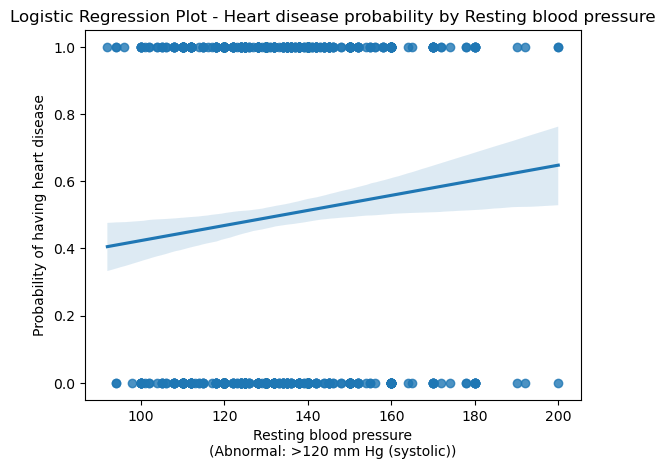

In [ ]:
# Create the regression plot
prob_target_bps = sns.regplot(x = 'resting bps', y = 'target', data= df_1)

# Add labels and title
prob_target_bps.set_xlabel('Resting blood pressure\n(Abnormal: >120 mm Hg (systolic))')
prob_target_bps.set_ylabel('Probability of having heart disease')
prob_target_bps.set_title('Logistic Regression Plot - Heart disease probability by Resting blood pressure')

prob_target_bps

### 2. Serum cholesterol

- Serum cholesterol refers to the measurement of total cholesterol levels in the blood. It encompasses all types of cholesterol, including both low-density lipoprotein (LDL) cholesterol, often called "bad" cholesterol, and high-density lipoprotein (HDL) cholesterol, known as "good" cholesterol.
- The desirable range for total cholesterol is typically below 200 mg/dL (5.2 mmol/L).

In [ ]:
# cholesterol
fig = px.box(df_2, y='target', x='cholesterol', color='target', points='all', title='Distribution by Serum Cholesterol')
fig.update_yaxes(title_text=None, categoryorder='array', categoryarray=['Normal', 'Heart Disease'])
fig.update_xaxes(title_text="Serum Cholesterol Level<br>(Abnormal: >200 mg/dL)")
fig.update_traces(showlegend=False)

fig.update_layout(
    width=1000,
    height=500,
    title_x=0.5,
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=14))
)

# Add the reference line at 120 mm Hg spanning the boxplot
fig.add_shape(type='line',
    x0=200, y0=0, x1=200, y1=1,
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='paper'
)

fig.show()

Observation:
- Majority of individuals exhibit serum cholesterol levels over the normal reading of 200 mg/ dL.
- The difference in serum cholesterol between patients with and without heart disease is insignificant.
- It is worth noting that the maximum value of serum cholesterol in heart disease patients, recorded as 603 mg/dL, stands out as an extreme outlier due to its exceptionally high value. However, we learnt that such elevated cholesterol levels, while rare, are within the realm of medical possibility.

In [ ]:
# Point-Biserial Correlation Coefficient

M_1 = df_1.loc[df_1['target'] == 1, 'cholesterol'].mean()
M_0 = df_1.loc[df_1['target'] == 0, 'cholesterol'].mean()
s_p = df_1['cholesterol'].std()
p = df_1['target'].mean()
q = 1 - p

r_pb = (M_1 - M_0) / s_p * np.sqrt(p * q)

t_stat = r_pb * np.sqrt((df_1.shape[0] - 2) / (1 - r_pb**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df_1.shape[0] - 2))

print(f"The p-value is: {p_value:.4f}")
print(f"The Point-Biserial Correlation Coefficient is: {r_pb:.4f}")

The p-value is: 0.0690
The Point-Biserial Correlation Coefficient is: 0.0562


As the p-value greater than 0.05, we CANNOT conclude that there is a statistically significant relationship between target and serum cholesterol.

### 3. Oldpeak (ST Segment Depression)

Oldpeak, also known as ST segment depression, refers to the amount of depression observed in the ST segment during exercise compared to rest. It is a numeric attribute that signifies the magnitude of downward displacement in millimeters (mm) of the ST segment compared to the baseline.

The typical reference range for oldpeak is:

- Normal range: 0 to 1.0 mm
- Borderline: 1.0 to 1.5 mm
- Significant ST depression: Greater than 1.5 mm

Negative oldpeak can sometimes happen and it can be a normal finding, particularly if the magnitude is small, indicating a mild or negligible response during exercise. However, if the negative oldpeak is significant, it could be an abnormal finding that requires further investigation, as it may suggest underlying heart issues or inadequate blood flow during physical activity.

In [ ]:
# oldpeak
fig = px.box(df_2, y='target', x='oldpeak', color='target', points='all', title='Distribution by Oldpeak (ST Segment Depression)')
fig.update_yaxes(title_text=None, categoryorder='array', categoryarray=['Normal', 'Heart Disease'])
fig.update_xaxes(title_text="Oldpeak (ST Segment Depression)<br>(Abnormal: >1.5 mm)", tickfont=dict(size=14))
fig.update_traces(showlegend=False)

fig.update_layout(
    width=1000,
    height=500,
    title_x=0.5,
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=14))
)

# Add the reference line at 1.5 mm Hg spanning the boxplot
fig.add_shape(type='line',
    x0=1.5, y0=0, x1=1.5, y1=1,
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='paper'
)

fig.show()

Observation:
- There appears to be a relationship between the oldpeak and the presence of heart disease. Individuals with heart disease tend to have a higher oldpeak compared to those without heart disease.
- The minimum oldpeak in normal individuals is -0.1, which is in a small magnitude. This could be considered a normal result and suggests that there are no significant abnormalities in the heart's response to exercise.

In [ ]:
# Point-Biserial Correlation Coefficient

M_1 = df_1.loc[df_1['target'] == 1, 'oldpeak'].mean()
M_0 = df_1.loc[df_1['target'] == 0, 'oldpeak'].mean()
s_p = df_1['oldpeak'].std()
p = df_1['target'].mean()
q = 1 - p

r_pb = (M_1 - M_0) / s_p * np.sqrt(p * q)

t_stat = r_pb * np.sqrt((df_1.shape[0] - 2) / (1 - r_pb**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df_1.shape[0] - 2))

print(f"The p-value is: {p_value:.4f}")
print(f"The Point-Biserial Correlation Coefficient is: {r_pb:.4f}")

The p-value is: 0.0000
The Point-Biserial Correlation Coefficient is: 0.2171


There is a normal correlation between target and oldpeak.

<Axes: title={'center': 'Logistic Regression Plot - Heart disease probability by Oldpeak (ST Segment Depression)'}, xlabel='Oldpeak (ST Segment Depression)', ylabel='Probability of having heart disease'>

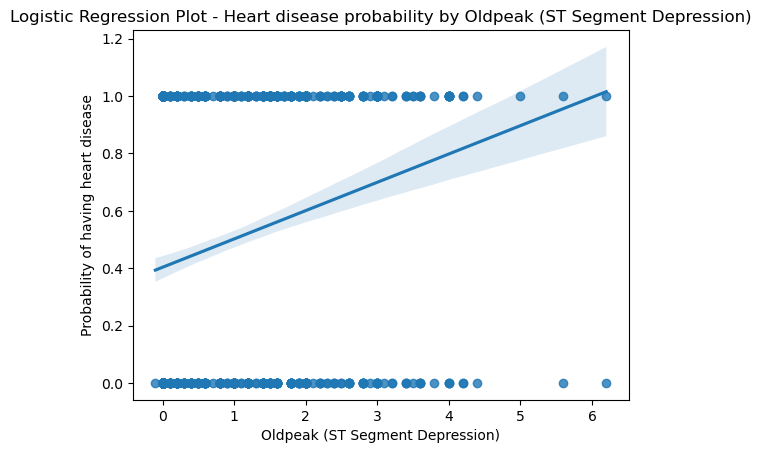

In [ ]:
# Create the regression plot
prob_target_oldpeak = sns.regplot(x = 'oldpeak', y = 'target', data= df_1)

# Add labels and title
prob_target_oldpeak.set_xlabel('Oldpeak (ST Segment Depression)')
prob_target_oldpeak.set_ylabel('Probability of having heart disease')
prob_target_oldpeak.set_title('Logistic Regression Plot - Heart disease probability by Oldpeak (ST Segment Depression)')

prob_target_oldpeak

# Section 3: Bivariate Analysis and Multivariate Analysis

## A. Using Heatmap for Scope Defining

We will investigate and explore the relationships between multiple variables in relation to the target variable (heart disease) in this section by examining the significant variable-variable pairs identified in the heatmap. Through this analysis, we seek to gain insights into the complex interplay of these factors and their collective influence on the target variable.

In [ ]:
# Select specific columns for correlation analysis
selected_columns = ['age', 'sex', 'chest pain type', 'resting bps', 'cholesterol',
                    'fasting blood sugar', 'resting ecg', 'max heart rate label', 'exercise angina',
                    'oldpeak', 'ST slope', 'target']

# List the column names you want to include

corr_matrix = df_1[selected_columns].corr(method='kendall')

# Rename the columns in the correlation matrix
new_column_names = {'age':'Age', 'sex':'Sex', 'chest pain type':'Chest pain type', 'resting bps':'Resting blood pressure', 'cholesterol':'Serum cholesterol',
                    'fasting blood sugar':'Fasting blood sugar', 'resting ecg':'Resting electrocardiogram', 'max heart rate label':'Maximum heart rate status', 'exercise angina':'Exercise-induced angina',
                    'oldpeak':'Oldpeak', 'ST slope':'ST slope', 'target':'Target'}

corr_matrix = corr_matrix.rename(columns=new_column_names, index=new_column_names)

# Ensure that the color scale is centered at 0
fig = px.imshow(corr_matrix,
                title='Correlation Heatmap',
                color_continuous_scale='RdBu',
                zmin=-1, zmax=1
                )

fig.update_layout(
    xaxis_title="Variables",
    yaxis_title="Variables",
    xaxis_side="bottom",
    title_y=0.95,
    width=800,
    height=800
)

fig.update_xaxes(title_text="Variables", tickangle=-90, title_standoff=25)
fig.update_yaxes(autorange="reversed")

# Add text annotations for the correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        fig.add_trace(go.Scatter(
            x=[corr_matrix.columns[j]],
            y=[corr_matrix.columns[i]],
            mode="text",
            text=[f"{corr_matrix.iloc[i, j]:.2f}"],
            showlegend=False
        ))


fig.show()

As noticed from the heatmap, there are several target-variable pairs with significant magnitudes:
- 0.53: Target vs ST slope
- 0.35: Target vs Chest pain type
- 0.27: Target vs Exercise-induced angina

Apart from the aforementioned target-variable pairs, several variable-variable pairs demonstrate considerable correlations:

- 0.39: Oldpeak vs Exercise-induced angina
- 0.34: Maximum heart rate status vs Exercise-induced angina
- 0.28: ST slope vs Chest pain type
- 0.28: ST slope vs Exercise-induced angina
- 0.24: Oldpeak vs ST slope

Given these findings, it is worthwhile to delve deeper into the associations among the variables and their potential impact on the target variable. To aid in our analysis, we categorize these variables into three groups for more comprehensive study:

- Oldpeak vs Exercise-induced angina<br>
- Maximum heart rate status vs Exercise-induced angina<br>
- ST slope, Chest pain type, Exercise-induced angina, Oldpeak (will be covered in part B "Using Binary Logistic Regression for Multivariate Analysis")

### Oldpeak vs Exercise-induced angina

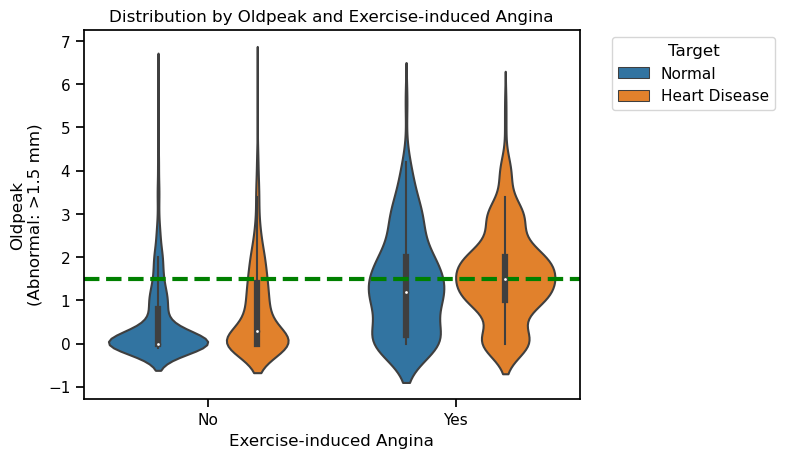

In [ ]:
# Set the default context
sns.set_context("notebook")

# Plot a violin plot
sns.violinplot(data=df_2, x='exercise angina', y='oldpeak', hue='target')
plt.xlabel('Exercise-induced Angina')
plt.ylabel('Oldpeak\n(Abnormal: >1.5 mm)')
plt.title('Distribution by Oldpeak and Exercise-induced Angina')
plt.legend(title='Target')

# Move the legend outside and to the right
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the horizontal reference line at oldpeak = 1.5
plt.axhline(y=1.5, color='green', linestyle='--', linewidth=3)

plt.show()

Observaion:
- Individuals with exercise-induced angina generally have higher oldpeak values, especially those with heart disease.
- The median of oldpeak for individuals with heart disease and exercise-induced angina is the highest compared to all other categories.
- There are more data points near lower oldpeak for normal individuals without exercise-induced angina compared to other groups.
- Some individuals have extreme oldpeak values, indicating that outliers are present this dataset.

### Maximum heart rate status vs Exercise-induced angina

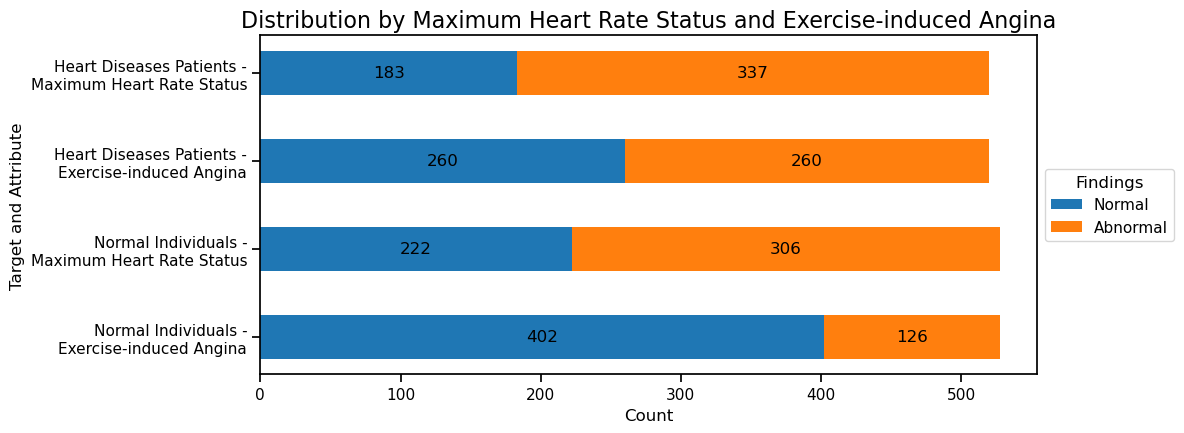

In [ ]:
# Function to calculate counts for each attribute
def get_counts(data, attribute):
    normal = data[data[attribute] == 0].shape[0]
    abnormal = data[data[attribute] == 1].shape[0]
    return normal, abnormal

target_0 = df_1[df_1['target'] == 0]
target_1 = df_1[df_1['target'] == 1]

# Calculate counts for each attribute and target
exercise_angina_0 = get_counts(target_0, 'exercise angina')
max_heart_rate_0 = get_counts(target_0, 'max heart rate label')
exercise_angina_1 = get_counts(target_1, 'exercise angina')
max_heart_rate_1 = get_counts(target_1, 'max heart rate label')

# Prepare data for plotting
data = {
    'Normal Individuals -\nExercise-induced Angina': exercise_angina_0,
    'Normal Individuals -\nMaximum Heart Rate Status': max_heart_rate_0,
    'Heart Diseases Patients -\nExercise-induced Angina': exercise_angina_1,
    'Heart Diseases Patients -\nMaximum Heart Rate Status': max_heart_rate_1
}

# Create the plot
fig, ax = plt.subplots(figsize=(12, 4.5))

# Plot stacked bars
bottom = np.zeros(4)
for category, color in zip(['Normal', 'Abnormal'], ['#1f77b4', '#ff7f0e']):
    values = [d[0] if category == 'Normal' else d[1] for d in data.values()]
    ax.barh(list(data.keys()), values, left=bottom, label=category, height=0.5)
    bottom += values

# Customize the plot
ax.set_title('Distribution by Maximum Heart Rate Status and Exercise-induced Angina', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Target and Attribute', fontsize=12)
ax.legend(title='Findings', loc='center left', bbox_to_anchor=(1, 0.5))

# Add value labels on the bars
for i, (c, v) in enumerate(zip(ax.containers, data.values())):
    ax.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()

Observation:
- Heart disease patients show a higher proportion of abnormal findings in both maximum heart rate status and exercise-induced angina compared to normal individuals.
- Both heart disease patients and normal individuals in this dataset have a higher count of abnormal maximum heart rate status (337 and 306) compared to normal (183 and 222).
- There are more normal individuals without exercise-induced angina (402) than those with (126), while heart disease patients have an equal distribution (260 each) for exercise-induced angina.

## B. Using Binary Logistic Regression for Multivariate Analysis
Our project primarily focuses on determining variable correlations through EDA without delving into modeling or predictive analysis. By utilizing the entire dataset and setting aside concerns about multicollinearity among independent variables, the project aims to gain insights from the correlation perspective.

To apply binary logistic regression:
- The dependent variable Y (i.e Target) is binary. Responses are coded as 0 and 1.
- Factor level 1 of the dependent variable represents the desired outcome. (1 = Heart Disease)
- Include meaningful explanatory variables, by investigating each of the columns in the dataset and determining whether they contribute to the binary outcome.
- Determine unique values of each variable. Convert strings to numbers or create dummy variables.
- Balance or normalise the data.

To check the variable association in a logistic regression:
- P-value determines the statistical significance of the relationship between the independent variable and the target variable.
- Proceed when p-value is smaller 0.05.
- Coefficient indicates the direction and magnitude of the relationship between the independent variable and the target variable, while holding all other variables constant.

In [ ]:
# Remove the unnecessary column categotical column 'age_group'

df_1.drop('age_group', axis=1, inplace=True)
df_1.drop('max heart rate status', axis=1, inplace=True)
df_1.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group_label,max heart rate label
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0,2,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1,3,0
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0,2,1
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1,3,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0,4,1


In [ ]:
# Set the X and y variables:
X = df_1.drop(['target'], axis = 1)
y = df_1['target']

Drawing insights from the heatmap in part A, we have selected four independent variables (ST slope, Chest pain type, Exercise-induced angina, Oldpeak) to analyze their relationship with the target variable. In this part, we will explore a variety of scenarios to further investigate these associations:

- Scenario 1: Oldpeak, ST slope, Chest pain type, Exercise-induced angina
- Scenario 2: Oldpeak, ST slope, Chest pain type
- Scenario 3: Oldpeak, ST slope, Exercise-induced angina
- Scenario 4: Oldpeak, Chest pain type, Exercise-induced angina
- Scenario 5: ST slope, Chest pain type, Exercise-induced angina

### Scenario 1: Oldpeak, ST slope, Chest pain type, Exercise-induced angina

In [ ]:
# 1: get logistic regression result

# select independent variables

cols_1 = ['oldpeak', 'ST slope', 'chest pain type', 'exercise angina']

# using the selected variable and the target variable, not split the dataset
X_fit_final = X[cols_1]
y_fit_final = y

# Checking the size of the dataframes, making sure they are compatable
X_fit_final.shape, y_fit_final.shape

# Set the logit() to accept y and x as parameters and return the logit object.
logit_model=sm.Logit(y_fit_final, X_fit_final)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.663890
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1048
Model:                          Logit   Df Residuals:                     1044
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.04217
Time:                        21:27:10   Log-Likelihood:                -695.76
converged:                       True   LL-Null:                       -726.39
Covariance Type:            nonrobust   LLR p-value:                 3.158e-13
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
oldpeak             0.0269      0.064      0.419      0.675      -0.099       0.153
ST slope            0.3347      0.097      3.468      0.001       0.146       0.524
chest pain type    -0.1589      0.050     -3.181      0.001      -0.257      -0.061
exercise angina     0.5987      0.150      3.988      0.000       0.304       0.893
===================================================================================
"""

In [ ]:
# 2. Extract the p-values and coefficients for scenario 1
pvalues = result.pvalues
coefs = result.params

results_df = pd.DataFrame({
    'Variable': pvalues.index,
    'p-value': pvalues.map(lambda x: '{:.3f}'.format(x)),
    'Coefficient': coefs.map(lambda x: '{:.3f}'.format(x))
})

# Sort the DataFrame by p-value
results_df = results_df.sort_values('p-value', ascending=False)

results_df

,Variable,p-value,Coefficient
oldpeak,oldpeak,0.675,0.027
ST slope,ST slope,0.001,0.335
chest pain type,chest pain type,0.001,-0.159
exercise angina,exercise angina,0.000,0.599


In [ ]:
# 3. Create the scatter plot to show p-value by independent variables
fig = go.Figure()

# Use p-value as the x-axis
marker_colors = ['red' if float(p) > 0.05 else 'blue' for p in results_df['p-value']]

fig.add_trace(go.Scatter(x=results_df['p-value'], y=results_df['Variable'], mode='markers', marker=dict(color=marker_colors, size=12)))

# Add the p-value reference line at 0.05
fig.add_shape(type='line',
    x0=0.05, y0=0, x1=0.05, y1=len(results_df['Variable']),
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='y'
)

# Update the layout
fig.update_layout(
    title='p-value (statistical significance)',
    xaxis_title='p-value',
    yaxis_title='Independent Variable (Scenario 1)',
    xaxis_type='log',
    xaxis_tickformat='.2f',
    width=1000
)

# Display the plot
fig.show()

In [ ]:
# 4. Coefficient Plot (excluded variables with p-value >0.05)

try:
    var_coe = result.params
    p_values = result.pvalues

    # Filter out dependent variables with p-value > 0.05
    significant_var = var_coe[p_values < 0.05]
    significant_var = significant_var.sort_values(ascending=False)

    # Create the Plotly figure
    fig = go.Figure()

    # Add the horizontal bars and indicate direction by colour
    fig.add_trace(go.Bar(
        x=significant_var.values,
        y=significant_var.index,
        orientation='h',
        marker=dict(
            color=['blue' if x >= 0 else 'red' for x in significant_var.values]
        )
    ))

    # Add text annotations for the coefficient values
    annotations = []
    for i, (coef, var) in enumerate(zip(significant_var.values, significant_var.index)):
        annotations.append(dict(
        x=coef,
        y=var,
        text=f"{coef:.2f}",
        showarrow=False,
        font=dict(
            family="sans serif",
            size=12,
            color="black"
        ),
        align="right",
        xanchor="left",
        yanchor="middle"
        ))

    # Set the layout
    fig.update_layout(
        title='[Scenario 1] Coefficient Plot (direction and magnitude)',
        xaxis_title='Coefficient',
        yaxis_title='Independent Variable',
        yaxis={'categoryorder': 'total ascending'},
        height=400,
        width = 600,
        xaxis_range=[-1, 1],
        annotations=annotations
    )

    # Display the plot
    fig.show()

except AttributeError:
    print("Feature importance or p-values not available for this model.")

### Scenario 2: Oldpeak, ST slope, Chest pain type

In [ ]:
# 1: get logistic regression result

# select independent variables
cols_2 = ['oldpeak', 'ST slope', 'chest pain type']

# using the selected variable and the target variable, not split the dataset
X_fit_final = X[cols_2]
y_fit_final = y

# Checking the size of the dataframes, making sure they are compatable
X_fit_final.shape, y_fit_final.shape

# Set the logit() to accept y and x as parameters and return the logit object.
logit_model=sm.Logit(y_fit_final, X_fit_final)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.671600
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1048
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.03105
Time:                        21:27:11   Log-Likelihood:                -703.84
converged:                       True   LL-Null:                       -726.39
Covariance Type:            nonrobust   LLR p-value:                 1.608e-10
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
oldpeak             0.1207      0.060      2.010      0.044       0.003       0.238
ST slope            0.3858      0.096      4.029      0.000       0.198       0.573
chest pain type    -0.1394      0.050     -2.815      0.005      -0.236      -0.042
===================================================================================
"""

In [ ]:
# 2. Extract the p-values and coefficients for scenario 2
pvalues = result.pvalues
coefs = result.params

results_df = pd.DataFrame({
    'Variable': pvalues.index,
    'p-value': pvalues.map(lambda x: '{:.3f}'.format(x)),
    'Coefficient': coefs.map(lambda x: '{:.3f}'.format(x))
})

# Sort the DataFrame by p-value
results_df = results_df.sort_values('p-value', ascending=False)

results_df

,Variable,p-value,Coefficient
oldpeak,oldpeak,0.044,0.121
chest pain type,chest pain type,0.005,-0.139
ST slope,ST slope,0.000,0.386


In [ ]:
# 3. Create the scatter plot to show p-value by independent variables
fig = go.Figure()

# Use p-value as the x-axis
marker_colors = ['red' if float(p) > 0.05 else 'blue' for p in results_df['p-value']]

fig.add_trace(go.Scatter(x=results_df['p-value'], y=results_df['Variable'], mode='markers', marker=dict(color=marker_colors, size=12)))

# Add the p-value reference line at 0.05
fig.add_shape(type='line',
    x0=0.05, y0=0, x1=0.05, y1=len(results_df['Variable']),
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='y'
)

# Update the layout
fig.update_layout(
    title='[Scenario 2] p-value Plot (statistical significance)',
    xaxis_title='p-value',
    yaxis_title='Independent Variable',
    xaxis_type='log',
    xaxis_tickformat='.2f',
    width=1000
)

# Display the plot
fig.show()

In [ ]:
# 4. Coefficient Plot (excluded variables with p-value >0.05)

try:
    var_coe = result.params
    p_values = result.pvalues

    # Filter out dependent variables with p-value > 0.05
    significant_var = var_coe[p_values < 0.05]
    significant_var = significant_var.sort_values(ascending=False)

    # Create the Plotly figure
    fig = go.Figure()

    # Add the horizontal bars and indicate direction by colour
    fig.add_trace(go.Bar(
        x=significant_var.values,
        y=significant_var.index,
        orientation='h',
        marker=dict(
            color=['blue' if x >= 0 else 'red' for x in significant_var.values]
        )
    ))

    # Add text annotations for the coefficient values
    annotations = []
    for i, (coef, var) in enumerate(zip(significant_var.values, significant_var.index)):
        annotations.append(dict(
        x=coef,
        y=var,
        text=f"{coef:.2f}",
        showarrow=False,
        font=dict(
            family="sans serif",
            size=12,
            color="black"
        ),
        align="right",
        xanchor="left",
        yanchor="middle"
        ))

    # Set the layout
    fig.update_layout(
        title='[Scenario 2] Coefficient Plot (direction and magnitude)',
        xaxis_title='Coefficient',
        yaxis_title='Independent Variable',
        yaxis={'categoryorder': 'total ascending'},
        height=400,
        width = 800,
        xaxis_range=[-1, 1],
        annotations=annotations
    )

    # Display the plot
    fig.show()

except AttributeError:
    print("Feature importance or p-values not available for this model.")

### Scenario 3: Oldpeak, ST slope, Exercise-induced angina

In [ ]:
# 1: get logistic regression result

# select independent variables
cols_3 = ['oldpeak', 'ST slope', 'exercise angina']

# using the selected variable and the target variable, not split the dataset
X_fit_final = X[cols_3]
y_fit_final = y

# Checking the size of the dataframes, making sure they are compatable
X_fit_final.shape, y_fit_final.shape

# Set the logit() to accept y and x as parameters and return the logit object.
logit_model=sm.Logit(y_fit_final, X_fit_final)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.668796
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1048
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.03509
Time:                        21:27:11   Log-Likelihood:                -700.90
converged:                       True   LL-Null:                       -726.39
Covariance Type:            nonrobust   LLR p-value:                 8.511e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
oldpeak             0.0173      0.064      0.272      0.786      -0.108       0.142
ST slope            0.0850      0.055      1.541      0.123      -0.023       0.193
exercise angina     0.5498      0.149      3.701      0.000       0.259       0.841
===================================================================================
"""

In [ ]:
# 2. Extract the p-values and coefficients for scenario 3
pvalues = result.pvalues
coefs = result.params

results_df = pd.DataFrame({
    'Variable': pvalues.index,
    'p-value': pvalues.map(lambda x: '{:.3f}'.format(x)),
    'Coefficient': coefs.map(lambda x: '{:.3f}'.format(x))
})

# Sort the DataFrame by p-value
results_df = results_df.sort_values('p-value', ascending=False)

results_df

,Variable,p-value,Coefficient
oldpeak,oldpeak,0.786,0.017
ST slope,ST slope,0.123,0.085
exercise angina,exercise angina,0.000,0.550


In [ ]:
# 3. Create the scatter plot to show p-value by independent variables
fig = go.Figure()

# Use p-value as the x-axis
marker_colors = ['red' if float(p) > 0.05 else 'blue' for p in results_df['p-value']]

fig.add_trace(go.Scatter(x=results_df['p-value'], y=results_df['Variable'], mode='markers', marker=dict(color=marker_colors, size=12)))

# Add the p-value reference line at 0.05
fig.add_shape(type='line',
    x0=0.05, y0=0, x1=0.05, y1=len(results_df['Variable']),
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='y'
)

# Update the layout
fig.update_layout(
    title='[Scenario 3] p-value Plot (statistical significance)',
    xaxis_title='p-value',
    yaxis_title='Independent Variable',
    xaxis_type='log',
    xaxis_tickformat='.2f',
    width=1000
)

# Display the plot
fig.show()

In [ ]:
# 4. Coefficient Plot (excluded variables with p-value >0.05)

try:
    var_coe = result.params
    p_values = result.pvalues

    # Filter out dependent variables with p-value > 0.05
    significant_var = var_coe[p_values < 0.05]
    significant_var = significant_var.sort_values(ascending=False)

    # Create the Plotly figure
    fig = go.Figure()

    # Add the horizontal bars and indicate direction by colour
    fig.add_trace(go.Bar(
        x=significant_var.values,
        y=significant_var.index,
        orientation='h',
        marker=dict(
            color=['blue' if x >= 0 else 'red' for x in significant_var.values]
        )
    ))

    # Add text annotations for the coefficient values
    annotations = []
    for i, (coef, var) in enumerate(zip(significant_var.values, significant_var.index)):
        annotations.append(dict(
        x=coef,
        y=var,
        text=f"{coef:.2f}",
        showarrow=False,
        font=dict(
            family="sans serif",
            size=12,
            color="black"
        ),
        align="right",
        xanchor="left",
        yanchor="middle"
        ))

    # Set the layout
    fig.update_layout(
        title='[Scenario 3] Coefficient Plot (direction and magnitude)',
        xaxis_title='Coefficient',
        yaxis_title='Independent Variable',
        yaxis={'categoryorder': 'total ascending'},
        height=300,
        width = 800,
        xaxis_range=[-1, 1],
        annotations=annotations
    )

    # Display the plot
    fig.show()

except AttributeError:
    print("Feature importance or p-values not available for this model.")

### Scenario 4: Oldpeak, Chest pain type, Exercise-induced angina

In [ ]:
# 1: get logistic regression result

# select independent variables
cols_4 = ['oldpeak', 'chest pain type', 'exercise angina']

# using the selected variable and the target variable, not split the dataset
X_fit_final = X[cols_4]
y_fit_final = y

# Checking the size of the dataframes, making sure they are compatable
X_fit_final.shape, y_fit_final.shape

# Set the logit() to accept y and x as parameters and return the logit object.
logit_model=sm.Logit(y_fit_final, X_fit_final)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.669752
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1048
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.03371
Time:                        21:27:11   Log-Likelihood:                -701.90
converged:                       True   LL-Null:                       -726.39
Covariance Type:            nonrobust   LLR p-value:                 2.319e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
oldpeak             0.0769      0.063      1.228      0.219      -0.046       0.200
chest pain type    -0.0175      0.029     -0.611      0.541      -0.074       0.039
exercise angina     0.6627      0.148      4.489      0.000       0.373       0.952
===================================================================================
"""

In [ ]:
# 2. Extract the p-values and coefficients for scenario 4
pvalues = result.pvalues
coefs = result.params

results_df = pd.DataFrame({
    'Variable': pvalues.index,
    'p-value': pvalues.map(lambda x: '{:.3f}'.format(x)),
    'Coefficient': coefs.map(lambda x: '{:.3f}'.format(x))
})

# Sort the DataFrame by p-value
results_df = results_df.sort_values('p-value', ascending=False)

results_df

,Variable,p-value,Coefficient
chest pain type,chest pain type,0.541,-0.018
oldpeak,oldpeak,0.219,0.077
exercise angina,exercise angina,0.000,0.663


In [ ]:
# 3. Create the scatter plot to show p-value by independent variables
fig = go.Figure()

# Use p-value as the x-axis
marker_colors = ['red' if float(p) > 0.05 else 'blue' for p in results_df['p-value']]

fig.add_trace(go.Scatter(x=results_df['p-value'], y=results_df['Variable'], mode='markers', marker=dict(color=marker_colors, size=12)))

# Add the p-value reference line at 0.05
fig.add_shape(type='line',
    x0=0.05, y0=0, x1=0.05, y1=len(results_df['Variable']),
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='y'
)

# Update the layout
fig.update_layout(
    title='[Scenario 4] p-value Plot (statistical significance)',
    xaxis_title='p-value',
    yaxis_title='Independent Variable',
    xaxis_type='log',
    xaxis_tickformat='.2f',
    width=1000
)

# Display the plot
fig.show()

In [ ]:
# 4. Coefficient Plot (excluded variables with p-value >0.05)

try:
    var_coe = result.params
    p_values = result.pvalues

    # Filter out dependent variables with p-value > 0.05
    significant_var = var_coe[p_values < 0.05]
    significant_var = significant_var.sort_values(ascending=False)

    # Create the Plotly figure
    fig = go.Figure()

    # Add the horizontal bars and indicate direction by colour
    fig.add_trace(go.Bar(
        x=significant_var.values,
        y=significant_var.index,
        orientation='h',
        marker=dict(
            color=['blue' if x >= 0 else 'red' for x in significant_var.values]
        )
    ))

    # Add text annotations for the coefficient values
    annotations = []
    for i, (coef, var) in enumerate(zip(significant_var.values, significant_var.index)):
        annotations.append(dict(
        x=coef,
        y=var,
        text=f"{coef:.2f}",
        showarrow=False,
        font=dict(
            family="sans serif",
            size=12,
            color="black"
        ),
        align="right",
        xanchor="left",
        yanchor="middle"
        ))

    # Set the layout
    fig.update_layout(
        title='[Scenario 4] Coefficient Plot (direction and magnitude)',
        xaxis_title='Coefficient',
        yaxis_title='Independent Variable',
        yaxis={'categoryorder': 'total ascending'},
        height=300,
        width = 800,
        xaxis_range=[-1, 1],
        annotations=annotations
    )

    # Display the plot
    fig.show()

except AttributeError:
    print("Feature importance or p-values not available for this model.")

### Scenario 5: ST slope, Chest pain type, Exercise-induced angina

In [ ]:
# 1: get logistic regression result

# select independent variables
cols_5 = ['ST slope', 'chest pain type', 'exercise angina']

# using the selected variable and the target variable, not split the dataset
X_fit_final = X[cols_5]
y_fit_final = y

# Checking the size of the dataframes, making sure they are compatable
X_fit_final.shape, y_fit_final.shape

# Set the logit() to accept y and x as parameters and return the logit object.
logit_model=sm.Logit(y_fit_final, X_fit_final)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.663973
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1048
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.04205
Time:                        21:27:12   Log-Likelihood:                -695.84
converged:                       True   LL-Null:                       -726.39
Covariance Type:            nonrobust   LLR p-value:                 5.433e-14
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ST slope            0.3436      0.094      3.648      0.000       0.159       0.528
chest pain type    -0.1580      0.050     -3.165      0.002      -0.256      -0.060
exercise angina     0.6213      0.140      4.434      0.000       0.347       0.896
===================================================================================
"""

In [ ]:
# 2. Extract the p-values and coefficients for scenario 5
pvalues = result.pvalues
coefs = result.params

results_df = pd.DataFrame({
    'Variable': pvalues.index,
    'p-value': pvalues.map(lambda x: '{:.3f}'.format(x)),
    'Coefficient': coefs.map(lambda x: '{:.3f}'.format(x))
})

# Sort the DataFrame by p-value
results_df = results_df.sort_values('p-value', ascending=False)

results_df

,Variable,p-value,Coefficient
chest pain type,chest pain type,0.002,-0.158
ST slope,ST slope,0.000,0.344
exercise angina,exercise angina,0.000,0.621


In [ ]:
# 3. Create the scatter plot to show p-value by independent variables
fig = go.Figure()

# Use p-value as the x-axis
marker_colors = ['red' if float(p) > 0.05 else 'blue' for p in results_df['p-value']]

fig.add_trace(go.Scatter(x=results_df['p-value'], y=results_df['Variable'], mode='markers', marker=dict(color=marker_colors, size=12)))

# Add the p-value reference line at 0.05
fig.add_shape(type='line',
    x0=0.05, y0=0, x1=0.05, y1=len(results_df['Variable']),
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='y'
)

# Update the layout
fig.update_layout(
    title='[Scenario 5] p-value Plot (statistical significance)',
    xaxis_title='p-value',
    yaxis_title='Independent Variable',
    xaxis_type='log',
    xaxis_tickformat='.2f',
    width=800
)

# Display the plot
fig.show()

In [ ]:
# 4. Coefficient Plot (excluded variables with p-value >0.05)

try:
    var_coe = result.params
    p_values = result.pvalues

    # Filter out dependent variables with p-value > 0.05
    significant_var = var_coe[p_values < 0.05]
    significant_var = significant_var.sort_values(ascending=False)

    # Create the Plotly figure
    fig = go.Figure()

    # Add the horizontal bars and indicate direction by colour
    fig.add_trace(go.Bar(
        x=significant_var.values,
        y=significant_var.index,
        orientation='h',
        marker=dict(
            color=['blue' if x >= 0 else 'red' for x in significant_var.values]
        )
    ))

    # Add text annotations for the coefficient values
    annotations = []
    for i, (coef, var) in enumerate(zip(significant_var.values, significant_var.index)):
        annotations.append(dict(
        x=coef,
        y=var,
        text=f"{coef:.2f}",
        showarrow=False,
        font=dict(
            family="sans serif",
            size=12,
            color="black"
        ),
        align="right",
        xanchor="left",
        yanchor="middle"
        ))

    # Set the layout
    fig.update_layout(
        title='[Scenario 5] Coefficient Plot (direction and magnitude)',
        xaxis_title='Coefficient',
        yaxis_title='Independent Variable',
        yaxis={'categoryorder': 'total ascending'},
        height=400,
        width = 1000,
        xaxis_range=[-1, 1],
        annotations=annotations
    )

    # Display the plot
    fig.show()

except AttributeError:
    print("Feature importance or p-values not available for this model.")

A table is created to summarise the cofficents in each scenario:

| Independent Variables     | Scenario 1 | Scenario 2 | Scenario 3 | Scenario 4 | Scenario 5 |
|---------------------------|------------|------------|------------|------------|------------|
| Oldpeak                   | X          | 0.12       | X          | X          | -          |
| ST Slope                  | 0.34       | 0.39       | X          | -          | 0.34       |
| Chest Pain Type           | -0.16      | -0.14      | -          | X          | -0.16      |
| Exercise-Induced Angina   | 0.60       | -          | 0.55       | 0.66       | 0.62       |

Remarks:
- Target is the dependent variable in each of these scenarios.<br>
- The sign 'X' means p-value > 0.05.<br>
- The sign '-' means that the variable is not present in a particular scenario.

We have the following findings:

- In the presence of exercise-induced angina and oldpeak, the oldpeak variable does not exhibit association with the target. This lack of association may be attributed to their relatively high correlation of 0.39 as highlighted in the heatmap, which is a potential reason for this pattern.
- Exercise-induced angina demonstrates a moderate association with the target across the scenarios outlined, even in scenarios 3 and 4 where other variables have p-value > 0.05.
- By comprison, the combination of the variables oldpeak, ST slope and chest pain type in scenario 2 display a notable association with the target.

We now shift our focus towards exploring the variables that exhibit low association as depicted in the heatmap. Specifically, we delve into the relationships of the following groups:

- Serum cholesterol, Sex, Resting electrocardiogram
- Maximum heart rate status, Fasting blood sugar, Resting blood pressure.

By honing in on these variables with low association, we aim to uncover insights that may not be apparent.

### Serum cholesterol, Sex, Resting electrocardiogram

In [ ]:
# 1: select independent variables
var_cols = ['cholesterol','sex', 'resting ecg']

# using the selected features and the target variable, not split the dataset
X_fit_final = X[var_cols]
y_fit_final = y

# Checking the size of the dataframes, making sure they are compatable
X_fit_final.shape, y_fit_final.shape

# Set the logit() to accept y and x as parameters and return the logit object.
logit_model=sm.Logit(y_fit_final, X_fit_final)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.685190
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1048
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.01144
Time:                        21:27:12   Log-Likelihood:                -718.08
converged:                       True   LL-Null:                       -726.39
Covariance Type:            nonrobust   LLR p-value:                 0.0002464
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
cholesterol    -0.0014      0.000     -3.055      0.002      -0.002      -0.001
sex             0.3154      0.127      2.477      0.013       0.066       0.565
resting ecg     0.2512      0.081      3.086      0.002       0.092       0.411
===============================================================================
"""

In [ ]:
# 2. Extract the p-values and coefficients
pvalues = result.pvalues
coefs = result.params

results_df = pd.DataFrame({
    'Variable': pvalues.index,
    'p-value': pvalues.map(lambda x: '{:.3f}'.format(x)),
    'Coefficient': coefs.map(lambda x: '{:.3f}'.format(x))
})

# Sort the DataFrame by p-value
results_df = results_df.sort_values('p-value', ascending=False)

results_df

,Variable,p-value,Coefficient
sex,sex,0.013,0.315
cholesterol,cholesterol,0.002,-0.001
resting ecg,resting ecg,0.002,0.251


In [ ]:
# 3. Create the scatter plot to show p-value by independent variables
fig = go.Figure()

# Use p-value as the x-axis
marker_colors = ['red' if float(p) > 0.05 else 'blue' for p in results_df['p-value']]

fig.add_trace(go.Scatter(x=results_df['p-value'], y=results_df['Variable'], mode='markers', marker=dict(color=marker_colors, size=12)))

# Add the p-value reference line at 0.05
fig.add_shape(type='line',
    x0=0.05, y0=0, x1=0.05, y1=len(results_df['Variable']),
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='y'
)

# Update the layout
fig.update_layout(
    title='p-value Plot (statistical significance)',
    xaxis_title='p-value',
    yaxis_title='Independent Variable',
    xaxis_type='log',
    xaxis_tickformat='.2f',
    width=1000
)

# Display the plot
fig.show()

In [ ]:
# 4. Coefficient Plot (excluded variables with p-value >0.05)

try:
    var_coe = result.params
    p_values = result.pvalues

    # Filter out dependent variables with p-value > 0.05
    significant_var = var_coe[p_values < 0.05]
    significant_var = significant_var.sort_values(ascending=False)

    # Create the Plotly figure
    fig = go.Figure()

    # Add the horizontal bars and indicate direction by colour
    fig.add_trace(go.Bar(
        x=significant_var.values,
        y=significant_var.index,
        orientation='h',
        marker=dict(
            color=['blue' if x >= 0 else 'red' for x in significant_var.values]
        )
    ))

    # Add text annotations for the coefficient values
    annotations = []
    for i, (coef, var) in enumerate(zip(significant_var.values, significant_var.index)):
        annotations.append(dict(
        x=coef,
        y=var,
        text=f"{coef:.2f}",
        showarrow=False,
        font=dict(
            family="sans serif",
            size=12,
            color="black"
        ),
        align="right",
        xanchor="left",
        yanchor="middle"
        ))

    # Set the layout
    fig.update_layout(
        title='Coefficient Plot (direction and magnitude)',
        xaxis_title='Coefficient',
        yaxis_title='Independent Variable',
        yaxis={'categoryorder': 'total ascending'},
        height=400,
        width = 600,
        xaxis_range=[-1, 1],
        annotations=annotations
    )

    # Display the plot
    fig.show()

except AttributeError:
    print("Feature importance or p-values not available for this model.")

Upon investigating variables with low association as indicated in the heatmap, the logistic regression analysis revealed association for the variables serum cholesterol, sex, resting electrocardiogram in relation to the target variable.

### Maximum heart rate status, Fasting blood sugar, Resting blood pressure

In [ ]:
# 1: get logistic regression result

# 1: select independent variables
var_cols = ['max heart rate label','fasting blood sugar', 'resting bps']

# using the selected features and the target variable, not split the dataset
X_fit_final = X[var_cols]
y_fit_final = y

# Checking the size of the dataframes, making sure they are compatable
X_fit_final.shape, y_fit_final.shape

# Set the logit() to accept y and x as parameters and return the logit object.
logit_model=sm.Logit(y_fit_final, X_fit_final)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.686275
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1048
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                0.009873
Time:                        21:27:13   Log-Likelihood:                -719.22
converged:                       True   LL-Null:                       -726.39
Covariance Type:            nonrobust   LLR p-value:                 0.0007679
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
max heart rate label     0.2239      0.127      1.769      0.077      -0.024       0.472
fasting blood sugar      0.5682      0.173      3.276      0.001       0.228       0.908
resting bps             -0.0017      0.001     -2.201      0.028      -0.003      -0.000
========================================================================================
"""

In [ ]:
# 2. Extract the p-values and coefficients
pvalues = result.pvalues
coefs = result.params

results_df = pd.DataFrame({
    'Variable': pvalues.index,
    'p-value': pvalues.map(lambda x: '{:.3f}'.format(x)),
    'Coefficient': coefs.map(lambda x: '{:.3f}'.format(x))
})

# Sort the DataFrame by p-value
results_df = results_df.sort_values('p-value', ascending=False)

results_df

,Variable,p-value,Coefficient
max heart rate label,max heart rate label,0.077,0.224
resting bps,resting bps,0.028,-0.002
fasting blood sugar,fasting blood sugar,0.001,0.568


In [ ]:
# 3. Create the scatter plot to show p-value by independent variables
fig = go.Figure()

# Use p-value as the x-axis
marker_colors = ['red' if float(p) > 0.05 else 'blue' for p in results_df['p-value']]

fig.add_trace(go.Scatter(x=results_df['p-value'], y=results_df['Variable'], mode='markers', marker=dict(color=marker_colors, size=12)))

# Add the p-value reference line at 0.05
fig.add_shape(type='line',
    x0=0.05, y0=0, x1=0.05, y1=len(results_df['Variable']),
    line=dict(color='green', width=5, dash='dash'),
    xref='x',
    yref='y'
)

# Update the layout
fig.update_layout(
    title='p-value Plot (statistical significance)',
    xaxis_title='p-value',
    yaxis_title='Independent Variable',
    xaxis_type='log',
    xaxis_tickformat='.2f',
    width=600
)

# Display the plot
fig.show()

In [ ]:
# 4. Coefficient Plot (excluded variables with p-value >0.05)

try:
    var_coe = result.params
    p_values = result.pvalues

    # Filter out dependent variables with p-value > 0.05
    significant_var = var_coe[p_values < 0.05]
    significant_var = significant_var.sort_values(ascending=False)

    # Create the Plotly figure
    fig = go.Figure()

    # Add the horizontal bars and indicate direction by colour
    fig.add_trace(go.Bar(
        x=significant_var.values,
        y=significant_var.index,
        orientation='h',
        marker=dict(
            color=['blue' if x >= 0 else 'red' for x in significant_var.values]
        )
    ))

    # Add text annotations for the coefficient values
    annotations = []
    for i, (coef, var) in enumerate(zip(significant_var.values, significant_var.index)):
        annotations.append(dict(
        x=coef,
        y=var,
        text=f"{coef:.2f}",
        showarrow=False,
        font=dict(
            family="sans serif",
            size=12,
            color="black"
        ),
        align="right",
        xanchor="left",
        yanchor="middle"
        ))

    # Set the layout
    fig.update_layout(
        title='Coefficient Plot (direction and magnitude)',
        xaxis_title='Coefficient',
        yaxis_title='Independent Variable',
        yaxis={'categoryorder': 'total ascending'},
        height=400,
        width = 600,
        xaxis_range=[-1, 1],
        annotations=annotations
    )

    # Display the plot
    fig.show()

except AttributeError:
    print("Feature importance or p-values not available for this model.")

Upon investigating variables with low association as indicated in the heatmap, the logistic regression analysis revealed association for the variables fasting blood sugar and resting blood pressure in relation to the target variable.

The disparities observed between the heatmap and the logistic regression analysis can be attributed to the distinct perspectives each method offers. While the heatmap provides a broad overview of variable correlations, logistic regression delves deeper into individual variable impacts on the target. It is essential to note that, as we venture into multivariate analysis, variables that initially exhibit low or no correlation in isolation may showcase varying degrees of influence on the target when combined with additional variables, emphasizing the dynamic nature of relationships within the dataset.

# Conclusion

Based on our analysis on this dataset, the following conclusions are drawn:

1. Among the variables explored, **ST slope**, **Oldpeak**, **Chest Pain Type**, and **Exercise-induced angina** exhibit significant associations with heart disease, indicating their potential importance as key indicators. Notably, ST slope, Oldpeak and Exercise-induced angina are intricately **tied to exercise**, and the first two are commonly evaluated during **exercise electrocardiogram tests**.
2. Variables derived from simple tests (such as blood pressure and blood tests) exhibit a weaker association with heart disease compared to exercise electrocardiogram-related variables, indicating that they may not be as effective in detecting heart disease on their own.
3. Among the two unchangeable variables, age has a relatively stronger association with heart disease compared to sex, but it is not as strong as the aforementioned exercise electrocardiogram variables.
4. Given that a significant portion of heart diseases can occur without noticeable symptoms, incorporating exercise electrocardiogram assessments into routine health check-ups is vital for early detection and management of potential cardiac conditions.